## TITANIC SURVIVAL PREDICTION

We will be working on the titanic dataset with the goal of  predicting a classification - survival or deceased. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [154]:
titanic_data = pd.read_csv('titanic_train.csv')

In [155]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Statistical Analysis and Data Visualization

In [157]:
titanic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

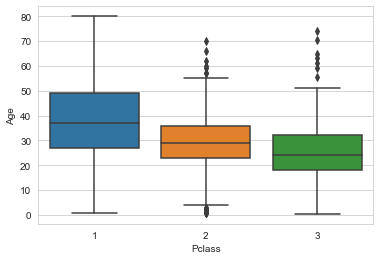

In [159]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

The above shows the average age of passengers by ticket class. We can conclude that the older people on board the Titanic opted for a First Class ticket while the younger passengers went with Third Class tickets. Below is a visual that depicts the classification of passengers by Age and Pclass.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

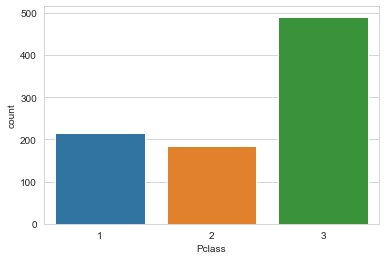

In [195]:
#Observing the number of passengers by passenger class
sns.countplot('Pclass', data=titanic_data, orient='h')

We see that majority of the people on board the Titanic are bought the Third Class ticket while the Second Class ticket had the least purchase.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

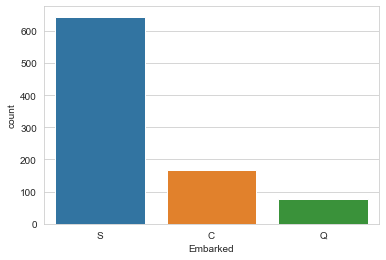

In [199]:
sns.countplot('Embarked', data=titanic_data)

A whooping 644(72%) of the passengers on the Titanic first cruise boarded at the Southampton Station while Queens had the least with about 80 passengers boardng from the station.

### Data Imputation

<AxesSubplot:>

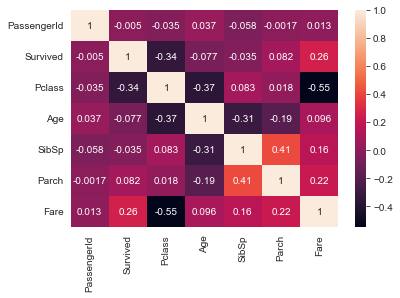

In [223]:
sns.heatmap(titanic_data.corr(), annot=True, cbar=True)

The correlation chart above shows that the features in our dataset are hardly related.

In [225]:
#Observing the null entries
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see a sum of all null values in our dataset. For Age column which is low considering the fact that we can categorize passenger age by ticket class hence, we could use imputation techniques to replace the missing values. For the Cabin column however, majority of the Cabin entries are null therefore, we might have to drop the column entirely.

Now, let us explore the Age column further to determine the best way for data imputation.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

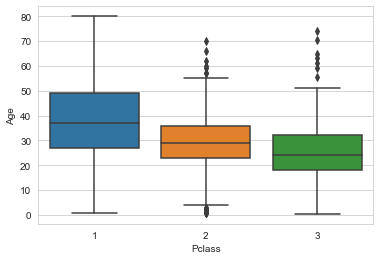

In [103]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

Since tickets are classified into 3 (Pclass), let us leverage that to impute missing values for the Age column by taking the average of each class. We would then fill the average value for each class to the missing fields as appropriate.

In [108]:
category = titanic_data.groupby('Pclass')
category['Age'].mean()
#titanic_data['Age'].fillna()

Pclass
1    38.062130
2    29.825163
3    25.101670
Name: Age, dtype: float64

In [105]:
def age_impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [106]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_impute, axis=1)

In [107]:
titanic_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [111]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dropping non-numeric columns aside the Sex and Embarked which we will use in our analysis after converting them to categorical data using the pd.get_dummies encoder

In [114]:
titanic_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [119]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [118]:
titanic_data['Sex'] = pd.get_dummies(titanic_data['Sex'], drop_first=True)

In [120]:
Embark_Station = pd.get_dummies(titanic_data['Embarked'], drop_first=True)

In [124]:
titanic_data.drop('Embarked', axis=1, inplace=True)

In [125]:
train = pd.concat([titanic_data, Embark_Station], axis=1)

In [221]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


Now that we have our data columns in numeric, we can proceed to train our model, make predictions off the model and evaluate the performance. 

### Importing the model and evaluation metrics

We will be using the Logistic Regression model for this task<br>
This is a classification problem hence suitable metrics are classification report and confusion matrix

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [131]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

Now let us instantiate and fit the model

In [135]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [136]:
predictions = model.predict(X_test)

In [137]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       162
           1       0.80      0.68      0.73       106

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



In [138]:
confusion_matrix(y_test, predictions)

array([[144,  18],
       [ 34,  72]], dtype=int64)

From the confusion matrix, we see that the misclassified data is quite low hence, it is safe to say our model performed well. However, it is important to know that we can improve the performance of our model with feature selection.